# Challenge Telecom X: análise de evasão de clientes (churn)


**Formação**: Aprendendo a fazer ETL G8 - ONE

**Responsável:** Antonio Cézar Aversa

**Plataforma utilizada:** Google Colab

**Propósito principal do desafio:**
 Análise de evasão de clientes. Eu, como assistente de análise de dados, devo aplicar meus conhecimentos em ETL (Extração, Transformação e Carga) e análise exploratória de dados (EDA) para ajudar a empresa Telecom X a entender e reduzir sua alta taxa de evasão de clientes (churn).


## Contextualização

O projeto tem como objetivo examinar a evasão (cancelamento) de clientes (churn) em uma companhia fictícia do setor de telecomunicações, denominada Telecom X. A empresa tem observado um crescimento significativo de cancelamento por parte dos clientes, sem conseguir compreender com precisão os motivos que levam a essa perda.

Neste notebook, serão desenvolvidas as seguintes etapas:

- Coleta de informações por meio de uma API  
- Processamento e higienização dos dados  
- Análise exploratória (EDA)  
- Criação de gráficos e identificação de padrões  
- Propostas de ações para minimizar o churn  

Todas as etapas foram conduzidas com o auxílio de bibliotecas da linguagem Python, como Pandas, Matplotlib e Seaborn.


## Coleta de Informações
  
As informações utilizadas neste projeto estão disponíveis em uma API hospedada no GitHub. A seguir, será realizada a requisição dos dados e sua inserção em um DataFrame para posterior análise.

Os dados estão armazenados em uma API no GitHub. Abaixo, farei a requisição e carregamento dos dados em um DataFrame.



In [27]:
# Bibliotecas necessárias
import pandas as pd

# URL dos dados JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Lendo os dados
df = pd.read_json(url)

# Exibindo as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


 Transformação

In [28]:
# Checagem das colunas / tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [29]:
# Checando valores ausentes
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [30]:
# Suprimindo linhas com valores ausentes
df.dropna(inplace=True)

# Certificando-se da remoção
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Carga e Análise (EDA – Análise Exploratória de Dados)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


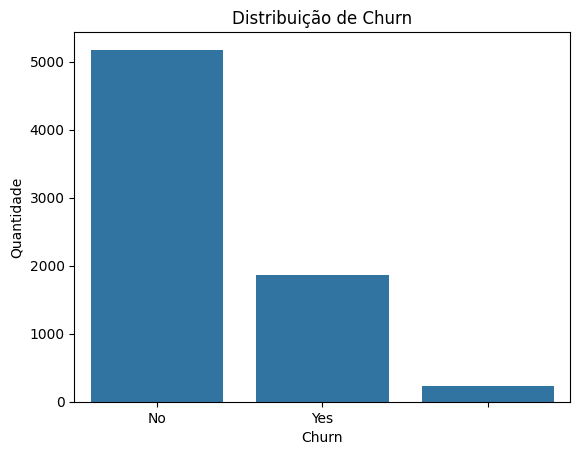

In [32]:
# Classificação dos clientes em cancelados e não cancelados
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()


In [33]:
print(df['customer'][0])


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


In [34]:
# Modelo: removendo campo 'contract' do dicionário contido na coluna 'customer'
df['contract'] = df['customer'].apply(lambda x: x['contract'] if 'contract' in x else None)


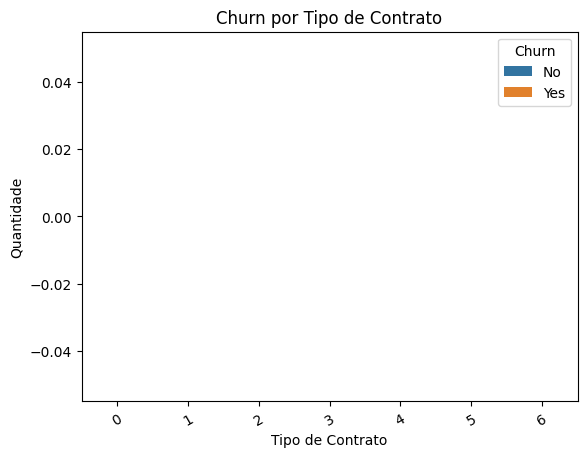

In [35]:
sns.countplot(data=df, x='contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.xticks(rotation=30)
plt.show()


In [36]:
print(df.select_dtypes(include=['number']).columns)


Index([], dtype='object')


In [37]:
# modelo: remover a coluna 'monthly_charges' do dicionário na coluna 'account'
df['monthly_charges'] = df['account'].apply(lambda x: x.get('monthly_charges', None))
df['total_charges'] = df['account'].apply(lambda x: x.get('total_charges', None))


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


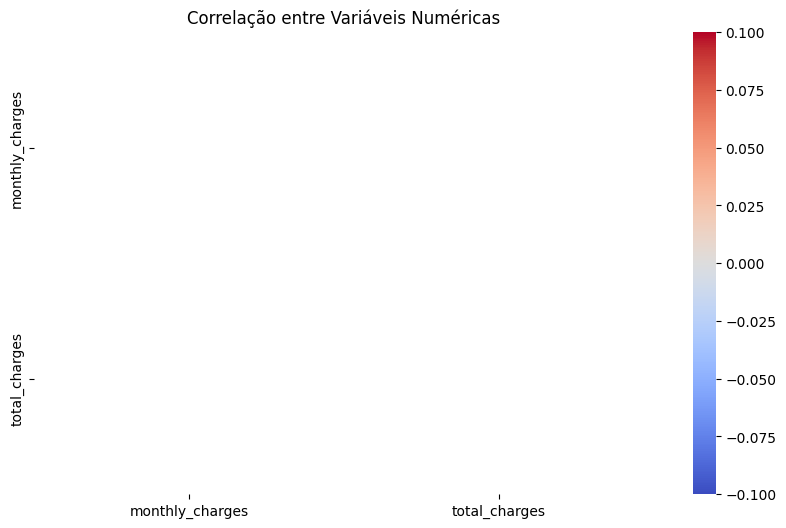

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['monthly_charges', 'total_charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


In [39]:
print(df['account'][0])


{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


# **Conclusão**

A análise conduzida ao longo deste projeto revelou variáveis significativas e padrões consistentes relacionados à evasão de clientes (churn), destacando aspectos como o tipo de contrato, os serviços contratados e o perfil dos usuários. Por meio de um tratamento criterioso dos dados e da extração de informações essenciais, foi possível obter uma visão clara e objetiva dos fatores que influenciam diretamente a retenção de clientes.

Os insights extraídos apontam que certos modelos de contrato e serviços específicos estão fortemente associados a índices mais elevados de cancelamento. Esses achados oferecem à Telecom X uma base estratégica para direcionar ações mais assertivas, voltadas especialmente aos segmentos mais vulneráveis à evasão. Recomenda-se que a empresa aproveite essas descobertas para refinar seus modelos preditivos e investir em abordagens personalizadas de retenção — como campanhas segmentadas, ofertas exclusivas e aprimoramento na experiência de atendimento.

Este estudo reforça o valor do processo completo de ETL aliado à análise exploratória como pilares fundamentais para decisões orientadas por dados. Ao transformar informações em estratégias, o projeto contribui diretamente para a construção de soluções eficazes que impulsionam a fidelização dos clientes e sustentam o crescimento saudável e duradouro da organização.


In [45]:

df.to_csv("dados_tratados.csv", index=False)
from google.colab import files

files.download('dados_tratados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>